Importing libraries and data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [2]:
df_loan = pd.read_csv('loan_approval.csv')
df_loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved


In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   2134 non-null   int64 
 1   no_of_dependents          2134 non-null   int64 
 2   education                 2134 non-null   object
 3   self_employed             2134 non-null   object
 4   income_annum              2134 non-null   int64 
 5   loan_amount               2134 non-null   int64 
 6   loan_term                 2134 non-null   int64 
 7   cibil_score               2134 non-null   int64 
 8   residential_assets_value  2134 non-null   int64 
 9   commercial_assets_value   2134 non-null   int64 
 10  luxury_assets_value       2134 non-null   int64 
 11  bank_asset_value          2134 non-null   int64 
 12  loan_status               2134 non-null   object
dtypes: int64(10), object(3)
memory usage: 216.9+ KB


In [4]:
df_loan.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2134.000000,2134.000000,2.134000e+03,2.134000e+03,2134.000000,2134.000000,2.134000e+03,2.134000e+03,2.134000e+03,2.134000e+03
mean,1067.500000,2.480319,5.032568e+06,1.506828e+07,10.701968,596.042643,7.505530e+06,5.071743e+06,1.502418e+07,4.944283e+06
std,616.177058,1.713228,2.765704e+06,8.903033e+06,5.741765,172.546634,6.451823e+06,4.403229e+06,8.965903e+06,3.203098e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,534.250000,1.000000,2.700000e+06,7.800000e+06,6.000000,447.000000,2.200000e+06,1.400000e+06,7.525000e+06,2.400000e+06
50%,1067.500000,2.000000,5.100000e+06,1.450000e+07,10.000000,592.000000,5.800000e+06,3.800000e+06,1.460000e+07,4.500000e+06
75%,1600.750000,4.000000,7.400000e+06,2.130000e+07,16.000000,744.000000,1.140000e+07,7.800000e+06,2.140000e+07,7.000000e+06
max,2134.000000,5.000000,9.900000e+06,3.850000e+07,20.000000,900.000000,2.850000e+07,1.940000e+07,3.910000e+07,1.470000e+07


In [5]:
df_loan.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

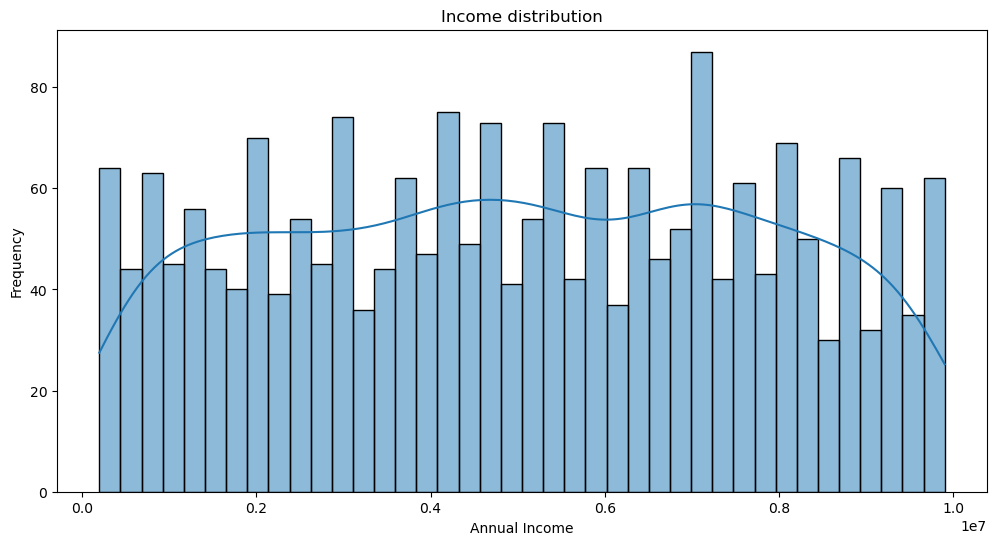

In [6]:
plt.figure(figsize= (12,6))
sns.histplot(df_loan['income_annum'],bins = 40, kde = True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Income distribution')
plt.show()

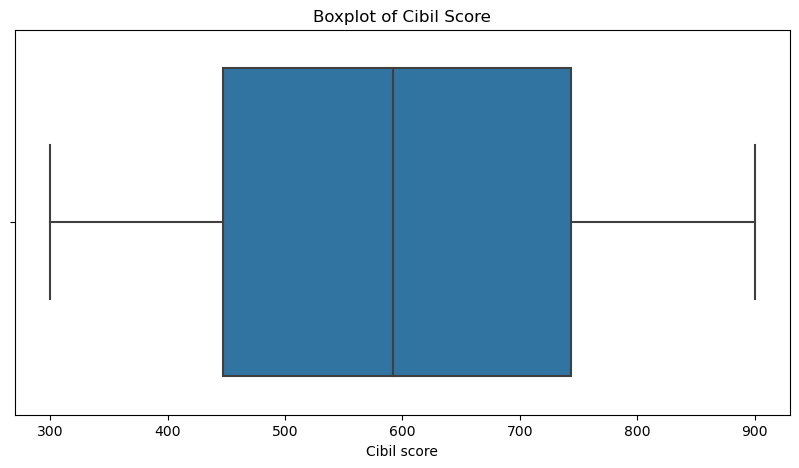

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_loan['cibil_score'])
plt.xlabel('Cibil score')
plt.title('Boxplot of Cibil Score')
plt.show()

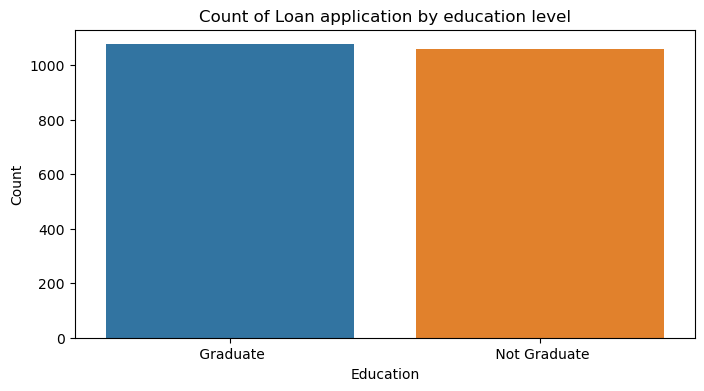

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_loan, x='education')
plt.title('Count of Loan application by education level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

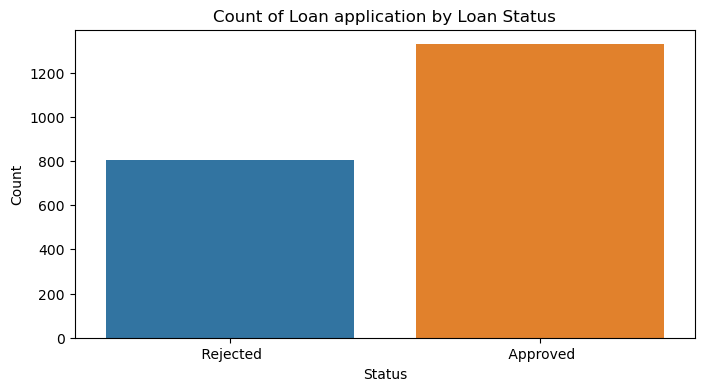

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_loan, x='loan_status')
plt.title('Count of Loan application by Loan Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


# Distribution of Approved and Rejected loans by Key Factor

#### Distribution of loan status by CIBIL score
#### Loan status by Education level
#### Distribution of loan status by Annual income


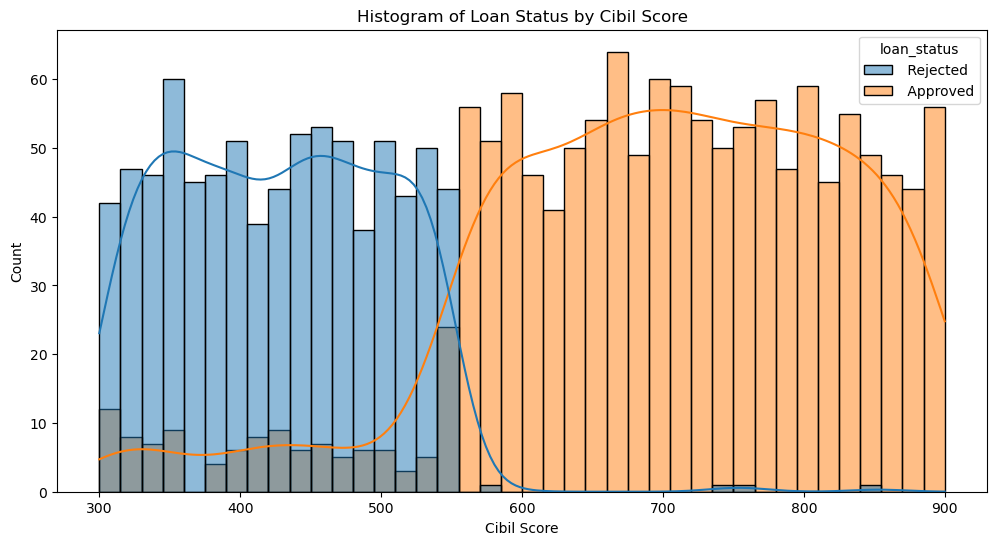

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(x='cibil_score',hue = 'loan_status',bins = 40,kde=True, data=df_loan)
plt.title('Histogram of Loan Status by Cibil Score')
plt.xlabel('Cibil Score')
plt.ylabel('Count')
plt.show()

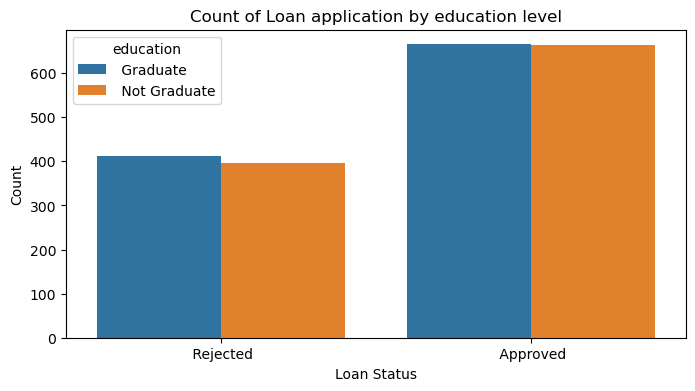

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_loan, x='loan_status',hue = 'education')
plt.title('Count of Loan application by education level')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

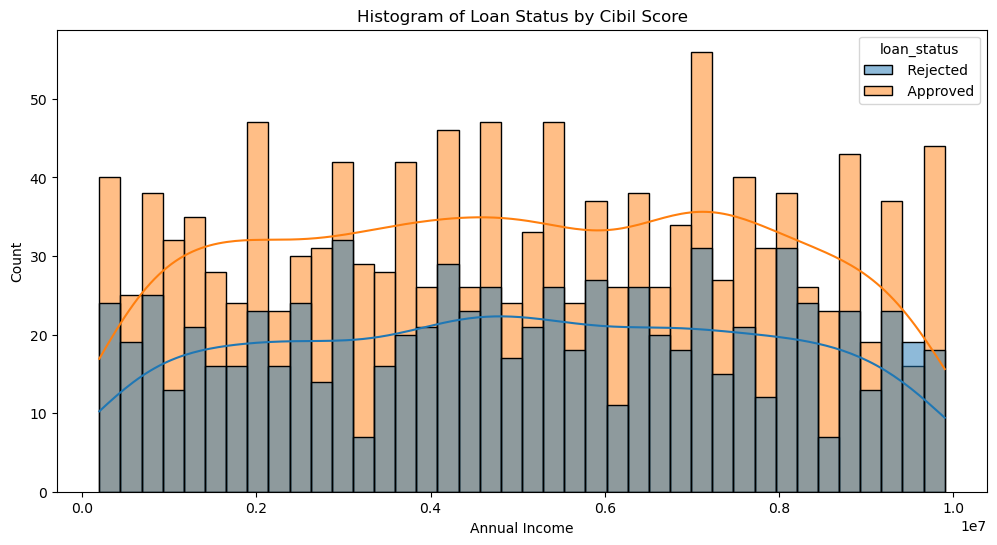

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(x='income_annum',hue = 'loan_status',bins = 40,kde=True, data=df_loan)
plt.title('Histogram of Loan Status by Cibil Score')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

## Relationship between Annual income and Loan amount for Approved Loans

In [13]:
df_loan['loan_status'] = df_loan['loan_status'].str.strip().str.capitalize()
df_approved = df_loan[df_loan['loan_status'] == 'Approved']
df_approved.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
5,6,2,Graduate,No,2700000,10300000,10,736,1000000,0,6200000,3300000,Approved
12,13,5,Not Graduate,Yes,8400000,22000000,2,830,3800000,3900000,19900000,5400000,Approved
13,14,3,Not Graduate,No,1600000,6200000,18,636,3400000,700000,5300000,1400000,Approved


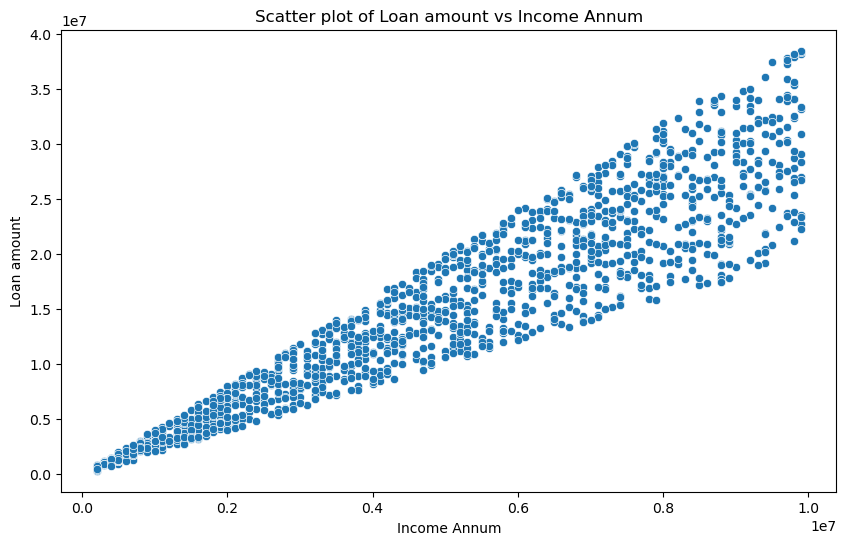

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_approved, x='income_annum',y='loan_amount')
plt.title('Scatter plot of Loan amount vs Income Annum')
plt.xlabel('Income Annum')
plt.ylabel('Loan amount')
plt.show()

Relationship between loan amount and Annual income for approved seems to be positively correlated, as seen in scatter plot. The loan amount generally increases as the annual income increases indicating direct proposnality. This trend indicates that applicant with high annual income tend to get loan approved of higher amount or tend to apply for loan with higher amount. However, the spread around the best fit imply that loan approval doesn't solely depend on the income and other factors also play a role in loan approval.

# Additional Factors to predict loan status

Now we will try to add few feature that might be helpful to determine the decision for the role.

In this csae I have added 3 feature Loan to Income ratio, Total asset value and Income per dependent.

In [15]:
df_loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved


In [16]:
def add_factors(df):
    df['loan_income_ratio'] = df['loan_amount']/df['income_annum']
    df['total_assets'] = (df['residential_assets_value'] +
                            df['commercial_assets_value'] + 
                            df['luxury_assets_value'] + 
                            df['bank_asset_value'])
    df['income_per_dependant'] = df['income_annum'] / (df['no_of_dependents'] + 1)
    
    return df

df_loan_add = add_factors(df_loan)
df_loan_add.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_income_ratio,total_assets,income_per_dependant
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,3.743902,52700000,2.050000e+06
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,2.812500,33900000,4.800000e+06
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved,3.461538,53300000,3.033333e+06
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected,3.894737,10900000,9.500000e+05
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved,3.200000,3400000,1.666667e+05


In [17]:
category_columns = df_loan_add.select_dtypes(include='object').columns
category_columns

Index(['education', 'self_employed', 'loan_status'], dtype='object')

In [18]:

encoder = LabelEncoder()
for column in category_columns:
    df_loan_add[column] = encoder.fit_transform(df_loan_add[column])
    
df_loan_add.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_income_ratio,total_assets,income_per_dependant
0,1,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,3.743902,52700000,2.050000e+06
1,2,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1,2.812500,33900000,4.800000e+06
2,3,2,0,1,9100000,31500000,14,679,10800000,16600000,20900000,5000000,0,3.461538,53300000,3.033333e+06
3,4,1,1,0,1900000,7400000,6,469,1900000,1200000,5900000,1900000,1,3.894737,10900000,9.500000e+05
4,5,2,0,1,500000,1600000,4,663,1300000,100000,1300000,700000,0,3.200000,3400000,1.666667e+05


In [19]:
X = df_loan_add.drop(columns =['loan_status'])
Y = df_loan_add['loan_status']

print(X.shape,Y.shape)

(2134, 15) (2134,)


#### With the added features we will try to predict the loan outcome and important features that affect the decision.

#### To find the best model we will train the data on different models to find best model and best feature

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 40)
print(X_train.head())
print(X_test.head())

      loan_id  no_of_dependents  education  self_employed  income_annum  \
700       701                 0          1              0       6200000   
2085     2086                 2          1              0       1900000   
670       671                 3          1              0        700000   
1126     1127                 2          0              1       8400000   
1807     1808                 1          0              0       8700000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
700      17300000          8          583                   3700000   
2085      4600000         12          587                   3000000   
670       2500000         14          819                   1600000   
1126     32600000         10          384                  13900000   
1807     34000000         16          663                   5400000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
700                   3900000             13600000

In [21]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In this case I will use Logisctic Regression, Decision Tree, Randon Forest, Gradient Boosting, XG Boost and Light GBM model to find the best model 

In [22]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {'Logistic Regression': LogisticRegression(),
         'Decision Tree Classifier': DecisionTreeClassifier(),
         'Random forest Classifier': RandomForestClassifier(),
          'Gradient Boosting Classifier': GradientBoostingClassifier(),
          'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric= 'logloss'),
          'Light GBM': LGBMClassifier()
          
         }

result = []

for model_name,model in models.items():
    model.fit(X_train,Y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    recall = recall_score(Y_test,y_pred)
    f1 = f1_score(Y_test,y_pred)
    roc_auc = roc_auc_score(Y_test,y_pred_prob)
    
    result.append({
        'Model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1':f1,
        'roc_auc':roc_auc
    })

result_df = pd.DataFrame(result)
result_df

[LightGBM] [Info] Number of positive: 645, number of negative: 1062
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2376
[LightGBM] [Info] Number of data points in the train set: 1707, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377856 -> initscore=-0.498659
[LightGBM] [Info] Start training from score -0.498659
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/Users/navaldhandha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:59:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.620609,0.333333,0.006211,0.012195,0.505277
1,Decision Tree Classifier,0.990632,0.987578,0.987578,0.987578,0.990029
2,Random forest Classifier,0.995316,1.000000,0.987578,0.993750,0.994851
3,Gradient Boosting Classifier,0.992974,0.993750,0.987578,0.990654,0.995914
4,XGBoost,0.992974,1.000000,0.981366,0.990596,0.996638
5,Light GBM,0.995316,1.000000,0.987578,0.993750,0.995447


Based on the above result we can see that Random Forest and Light GBM work best for our data with the accuracy of 99.53% f1 score of 0.993 and precision score of 1 which means our model is able to predict positive outcome with 100% accuracy no false positives. Gradient Boosting and XGBoost are next best models with accuracy of 99.29% and precision score of 0.9937 and 1 respectively. Decision Tree has an accuracy of 99.06% and worst model for our case is Logistic regression with the accuracy of 62.06%. 

Now we will try to visualize the importance of different features from different models

/Users/navaldhandha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:59:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 806, number of negative: 1328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 2134, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377694 -> initscore=-0.499346
[LightGBM] [Info] Start training from score -0.499346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

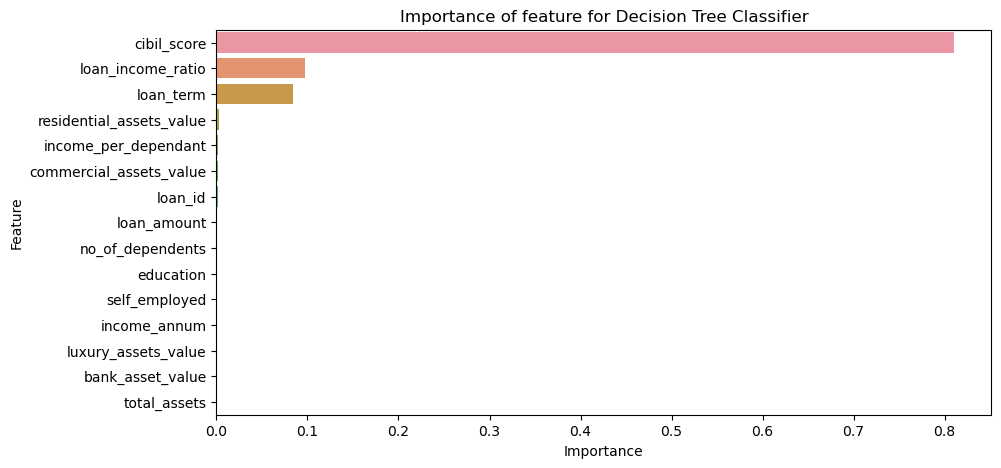

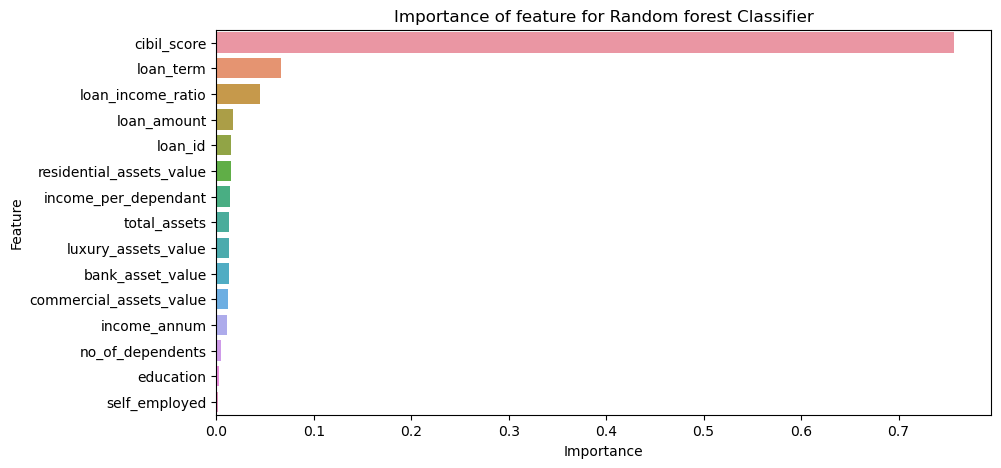

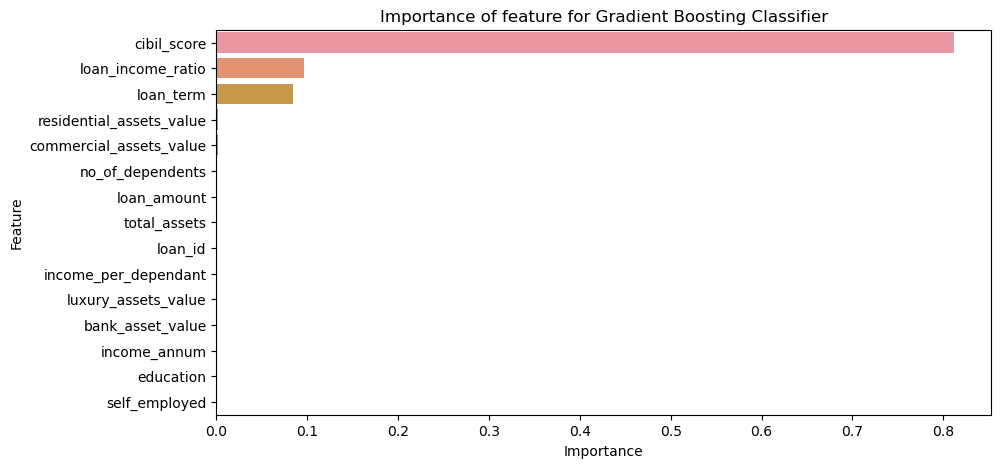

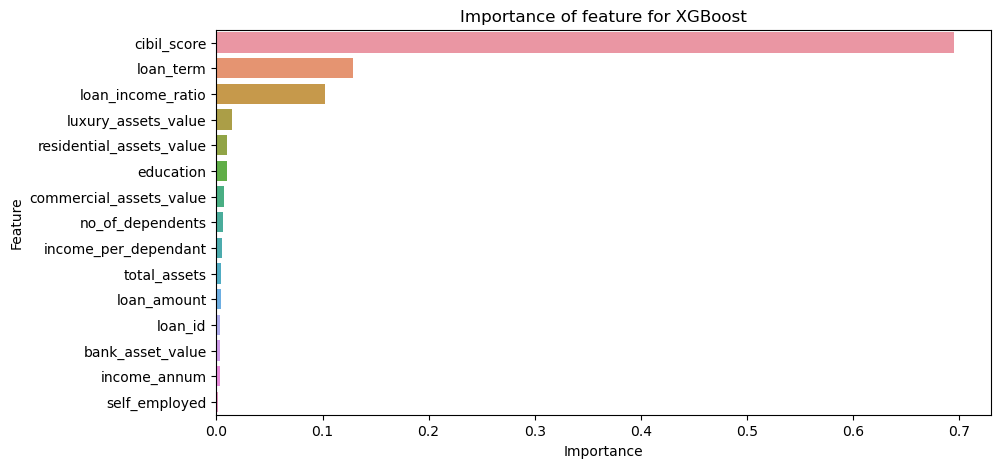

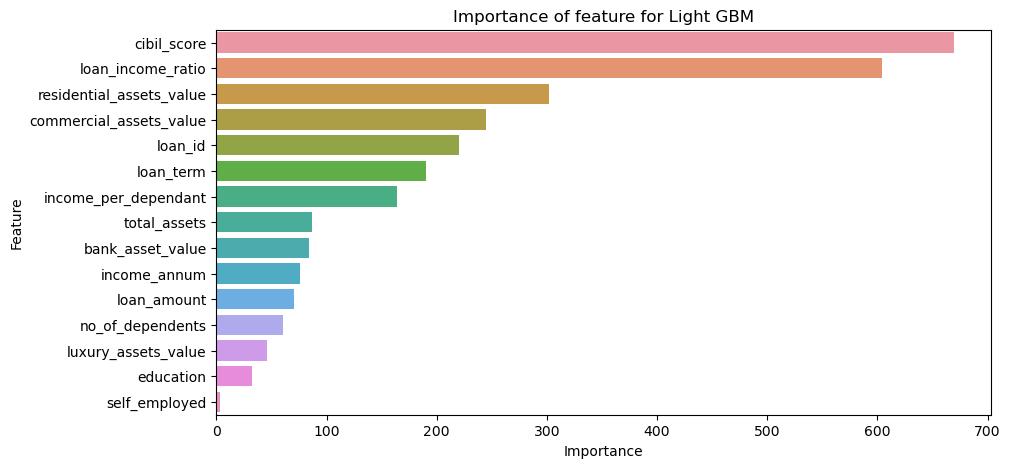

In [23]:
import numpy as np
def calculate_feature_importance(model,feature,model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
    feature_importance_df = pd.DataFrame({'Feature':feature,'Importance':importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)
    
    plt.figure(figsize=(10,5))
    sns.barplot(data=feature_importance_df,x='Importance',y='Feature')
    plt.title(f'Importance of feature for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')

for model_name, model in models.items():
    if model_name != 'Logistic Regression':
        model.fit(X,Y)
        calculate_feature_importance(model,X.columns,model_name)
        

Based on the above charts we can see that most important feature for decision making for all the model is CIBIL score having the stronger CIBIL score definately increases your probability of getting loan approved.
The other feature that can be considered based on the top performing model is loan to income ratio. 

Loan to income ratio calculated as the loan to income ratio:

This feature directly measures the proportion of the borrower's money commited to loan repayment higher loan to income ration means larger part of the income goes towards loan repayment signaling higher debt burden and greater financial strain. 

Lenders often use this to assess applicant's ability to manage the loan payment based on their income. Applicant with less loan to income ratio means they have more disposable amount which means they are less likely to default while higher ratio indicate risk of default.
